In [2]:
import json
from pandas import json_normalize
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import seaborn as sns

In [3]:
# !pip install statsbombpy
# !pip install mplsoccer

pd.set_option('display.max_seq_items', None)

In [4]:
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, Sbopen
# from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams

In [5]:
wc19 =pd.read_pickle('wc19.pkl')
wc19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         43744 non-null  int64  
 1   pass_angle                     43744 non-null  float64
 2   pass_length                    43744 non-null  float64
 3   pass_recipient                 43744 non-null  object 
 4   possession_team                43744 non-null  object 
 5   possession_team_id             43744 non-null  int64  
 6   player                         43744 non-null  object 
 7   player_id                      43744 non-null  float64
 8   match_id                       43744 non-null  int64  
 9   pass_outcome_Complete          43744 non-null  uint8  
 10  pass_outcome_Incomplete        43744 non-null  uint8  
 11  pass_outcome_Injury Clearance  43744 non-null  uint8  
 12  pass_outcome_Out               43744 non-null 

In [6]:
wc19.pass_outcome_Complete.value_counts()

1    35418
0     8326
Name: pass_outcome_Complete, dtype: int64

In [7]:
euro22 =pd.read_pickle('euro22.pkl')
euro22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26002 entries, 0 to 26001
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         26002 non-null  int64  
 1   pass_angle                     26002 non-null  float64
 2   pass_length                    26002 non-null  float64
 3   pass_recipient                 26002 non-null  object 
 4   possession_team                26002 non-null  object 
 5   possession_team_id             26002 non-null  int64  
 6   player                         26002 non-null  object 
 7   player_id                      26002 non-null  float64
 8   match_id                       26002 non-null  int64  
 9   pass_outcome_Complete          26002 non-null  uint8  
 10  pass_outcome_Incomplete        26002 non-null  uint8  
 11  pass_outcome_Injury Clearance  26002 non-null  uint8  
 12  pass_outcome_Out               26002 non-null 

In [8]:
euro22.pass_outcome_Unknown.value_counts()


0    25959
1       43
Name: pass_outcome_Unknown, dtype: int64

In [9]:
#pitch = Pitch(pitch_type = 'statsbomb', pitch_color='#38383b',line_color='white', constrained_layout=False, tight_layout=True,view='full')

In [10]:
# a function to draw the pitch, and plot the passes on the pitch, split complete & incomplete passes
# based on a player's passes in a competition

def playerpasses(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['pass_outcome_Complete'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['player']==name and thepass['pass_outcome_Complete'] == 0:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        

# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='completed passes')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='other passes')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30, color = 'w')

In [11]:
# a function to draw the pitch, and plot the passes on the pitch, split in halves
# based on a player's passes in a competition

def playerpasses_inhalves(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['period'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['player']==name and thepass['period'] == 2:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        
                             

            
# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='first half')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='second half')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30, color = 'w')

In [12]:
# a function to draw the pitch, and plot the progressive passes on the pitch
# based on a player's passes in a competition

def prog_passes(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['end_x'] > thepass['start_x']:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        if thepass['player']==name and thepass['end_x'] < thepass['start_x']:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                         ax=ax)
        
            
            

            
# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='progressive passes')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='other passes')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30, color = 'w')

In [13]:
pd.set_option('display.max_seq_items', None)
wc19['player'].value_counts().head(60)

Lucy Bronze                               526
Desiree van Lunteren                      471
Sherida Spitse                            451
Stephanie Houghton                        435
Dominique Johanna Anna Petrone Janssen    398
Abby Dahlkemper                           366
Sara Caroline Seger                       353
Jackie Groenen                            336
Crystal Alyssia Dunn Soubrier             334
Magdalena Lilly Eriksson                  333
Nilla Fischer                             324
Hanna Erica Maria Glas                    319
Emily Louise van Egmond                   315
Amel Majri                                312
Alanna Stephanie Kennedy                  309
Jill Scott                                309
Danielle van de Donk                      303
Kelley Maureen O''Hara                    297
Stephanie van der Gragt                   296
Linda Brigitta Sembrant                   295
Wendie Renard                             295
Rebecca Elizabeth Sauerbrunn      

In [14]:
glossary_eur = euro22[euro22['possession_team_id'] == 865]

In [15]:
for_ref = glossary_eur.groupby(['player', 'player_id']).count()

In [16]:
#wc22[['possession_team', 'possession_team_id']].unique()
glossary_wc = wc19.groupby('possession_team').mean()

In [17]:
glossary_wc.head()

period  pass_angle  pass_length  possession_team_id  \
possession_team                                                            
Argentina Women's  1.463625    0.003923    20.531730              1204.0   
Australia Women's  1.553004   -0.014679    20.838667              1205.0   
Brazil Women's     1.562310    0.021645    19.944552              1203.0   
Cameroon Women's   1.516619   -0.021169    21.806394              1208.0   
Canada Women's     1.504647    0.047442    20.423755              1206.0   

                      player_id      match_id  pass_outcome_Complete  \
possession_team                                                        
Argentina Women's  22501.003699  43097.163995               0.712700   
Australia Women's  11054.882951  49267.898410               0.852915   
Brazil Women's     16758.512462  45519.727052               0.827964   
Cameroon Women's   22201.971510  46581.581197               0.677113   
Canada Women's     12435.979089  42390.647305               0.847119   

                   pass_outcome_Incomplete  pass_outcome_Injury Clearance  \
possession_team                                                             
Argentina Women's                 0.255240                            0.0   
Australia Women's                 0.125442                            0.0   
Brazil Women's                    0.146505                            0.0   
Cameroon Women's                  0.279202                            0.0   
Canada Women's                    0.135223                            0.0   

                   pass_outcome_Out  pass_outcome_Pass Offside  \
possession_team                                                  
Argentina Women's          0.018496                   0.008631   
Australia Women's          0.015018                   0.003534   
Brazil Women's             0.016413                   0.004863   
Cameroon Women's           0.029440                   0.007597   
Canada Women's             0.013011                   0.003253   

                   pass_outcome_Unknown    start_x    start_y      end_x  \
possession_team                                                            
Argentina Women's              0.004932  49.795068  39.421332  61.425154   
Australia Women's              0.003092  57.483834  41.061926  63.765504   
Brazil Women's                 0.004255  51.870091  36.150578  59.170091   
Cameroon Women's               0.006648  55.317664  43.171320  67.508357   
Canada Women's                 0.001394  60.282993  40.771794  66.430297   

                       end_y  pass_height_Ground Pass  pass_height_High Pass  \
possession_team                                                                
Argentina Women's  39.230456                 0.482121               0.357583   
Australia Women's  41.019346                 0.727032               0.169170   
Brazil Women's     36.068754                 0.646201               0.183587   
Cameroon Women's   42.777683                 0.497626               0.326686   
Canada Women's     40.499349                 0.679368               0.164963   

                   pass_height_Low Pass  
possession_team                          
Argentina Women's              0.160296  
Australia Women's              0.103799  
Brazil Women's                 0.170213  
Cameroon Women's               0.175689  
Canada Women's                 0.155669

In [18]:
glossary_eur = euro22.groupby('possession_team').mean()

In [19]:
glossary_eur.head()

period  pass_angle  pass_length  possession_team_id  \
possession_team                                                          
Austria Women's  1.447101   -0.013934    20.106534               859.0   
Belgium Women's  1.459309   -0.074478    21.134901               854.0   
Denmark Women's  1.421268   -0.042005    19.904604               853.0   
England Women's  1.646346   -0.009824    20.474012               865.0   
France Women's   1.543013   -0.004005    19.489862               861.0   

                     player_id      match_id  pass_outcome_Complete  \
possession_team                                                       
Austria Women's   22644.631884  3.837159e+06               0.800725   
Belgium Women's  135179.164612  3.837449e+06               0.810727   
Denmark Women's   54910.837423  3.835329e+06               0.862986   
England Women's   14595.313574  3.839816e+06               0.907039   
France Women's    18657.098093  3.838965e+06               0.880109   

                 pass_outcome_Incomplete  pass_outcome_Injury Clearance  \
possession_team                                                           
Austria Women's                 0.182609                            0.0   
Belgium Women's                 0.165228                            0.0   
Denmark Women's                 0.125767                            0.0   
England Women's                 0.077804                            0.0   
France Women's                  0.105489                            0.0   

                 pass_outcome_Out  pass_outcome_Pass Offside  \
possession_team                                                
Austria Women's          0.012319                   0.003623   
Belgium Women's          0.017879                   0.003083   
Denmark Women's          0.007157                   0.003067   
England Women's          0.009094                   0.004379   
France Women's           0.010121                   0.003503   

                 pass_outcome_Unknown    start_x    start_y      end_x  \
possession_team                                                          
Austria Women's              0.000725  53.974203  41.037174  60.888623   
Belgium Women's              0.003083  46.884032  41.193342  54.331134   
Denmark Women's              0.001022  54.886196  40.336503  60.920348   
England Women's              0.001684  58.304648  38.895150  62.964971   
France Women's               0.000779  57.709576  39.454107  63.013429   

                     end_y  pass_height_Ground Pass  pass_height_High Pass  \
possession_team                                                              
Austria Women's  40.496594                 0.655072               0.217391   
Belgium Women's  40.689766                 0.688039               0.188039   
Denmark Women's  40.308896                 0.689162               0.207566   
England Women's  38.937083                 0.762883               0.155271   
France Women's   39.160802                 0.768782               0.121837   

                 pass_height_Low Pass  
possession_team                        
Austria Women's              0.127536  
Belgium Women's              0.123921  
Denmark Women's              0.103272  
England Women's              0.081846  
France Women's               0.109381

### Pre modelling EDA

In [20]:
eur_eng = euro22[euro22['possession_team_id'] == 865]
wc_eng = wc19[wc19['possession_team_id'] == 865]
eur_ger = euro22[euro22['possession_team_id'] == 857]
wc_usa = wc19[wc19['possession_team_id'] == 1214]

In [21]:
eur_engkw = euro22[euro22['player'] == 'Keira Walsh']

In [22]:
eur_engkw.pass_outcome_Complete.value_counts()

1    316
0     23
Name: pass_outcome_Complete, dtype: int64

In [23]:
wckw = wc19[wc19['player'] == 'Keira Walsh']

In [24]:
wckw.pass_outcome_Complete.value_counts()

1    230
0     35
Name: pass_outcome_Complete, dtype: int64

In [25]:
pass_tochangetype = ['pass_outcome_Complete',
                     'pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']



In [26]:
euro22[euro22.player == 'Keira Walsh']['pass_outcome_Complete'].value_counts()

1    316
0     23
Name: pass_outcome_Complete, dtype: int64

In [27]:
pd.set_option('display.max_seq_items', None)
euro22['player'].value_counts().head(60)

Leah Williamson                           496
María Pilar León Cebrián                  394
Lucy Bronze                               353
Ona Batlle Pascual                        339
Keira Walsh                               339
Millie Bright                             327
Irene Paredes Hernandez                   326
Wendie Renard                             320
Patricia Guijarro Gutiérrez               319
Kathrin Julia Hendrich                    300
Rachel Daly                               297
Marina Hegering                           293
Giulia Gwinn                              291
Aitana Bonmati Conca                      289
Sakina Karchaoui                          285
María Francesca Caldentey Oliver          268
Dominique Johanna Anna Petrone Janssen    266
Eve Perisset                              254
Felicitas Rauch                           221
Amanda Ilestedt                           220
Magdalena Lilly Eriksson                  217
Gun Nathalie Björn                

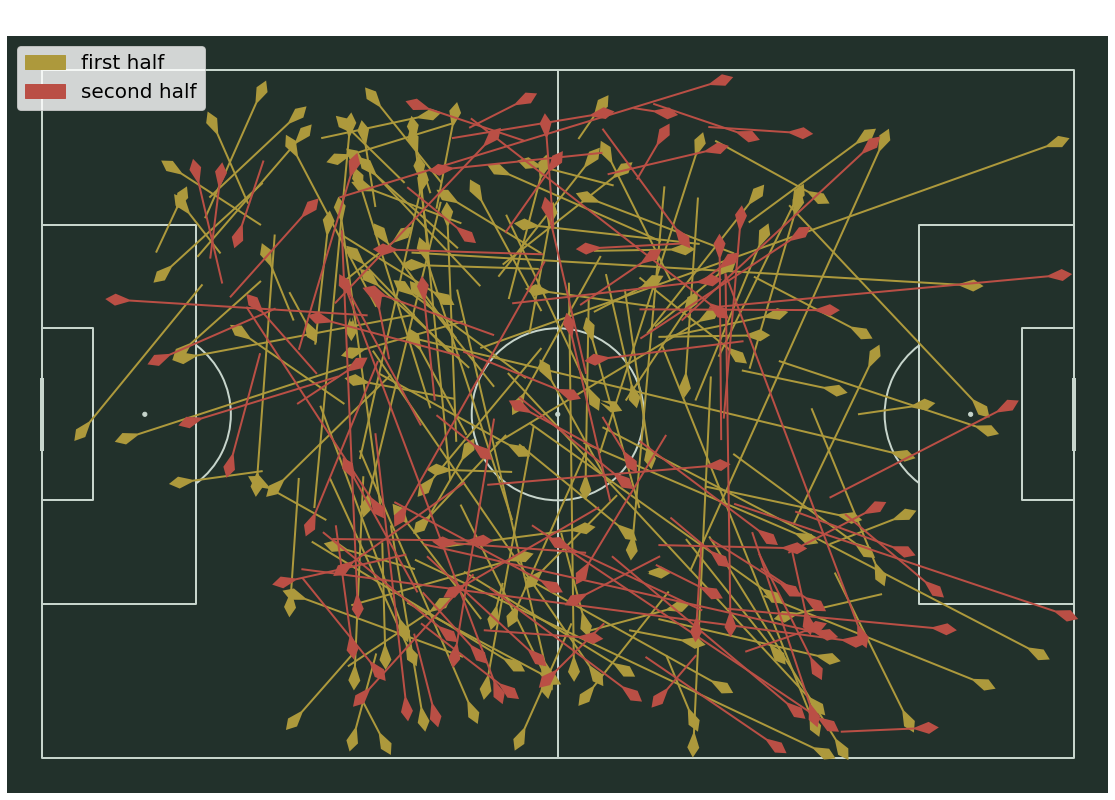

In [28]:
playerpasses_inhalves('Keira Walsh',wc19)

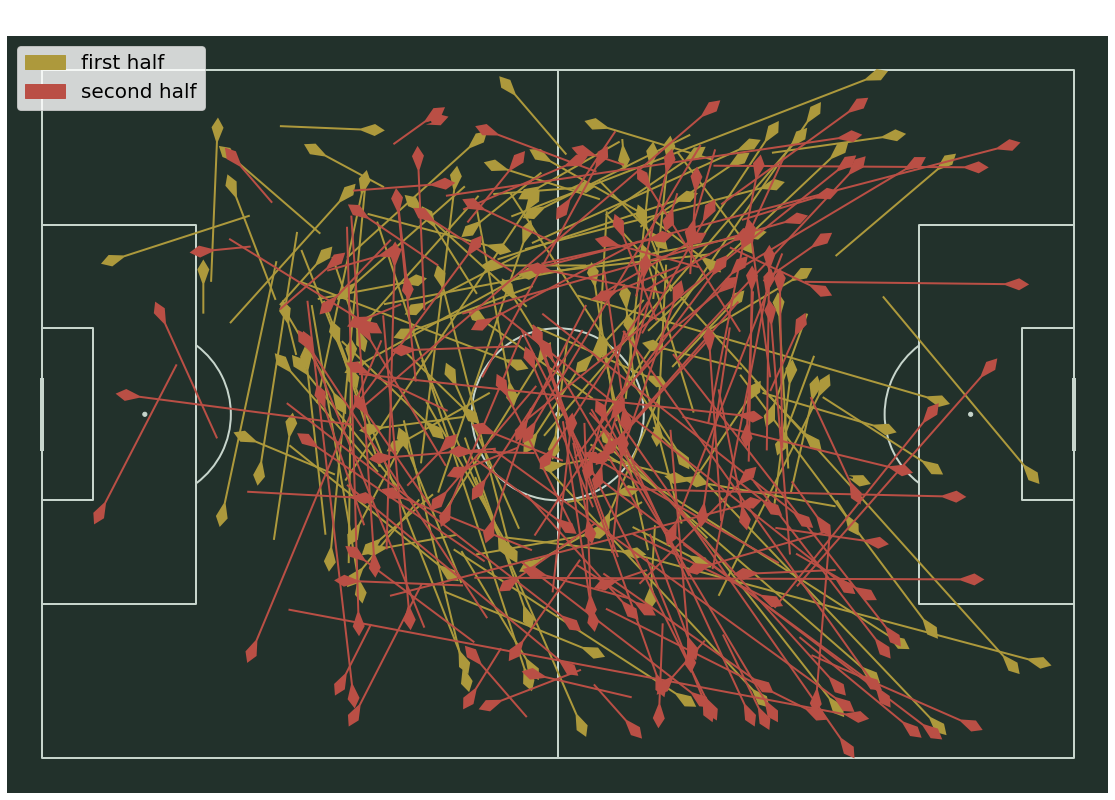

In [29]:
playerpasses_inhalves('Keira Walsh',euro22)

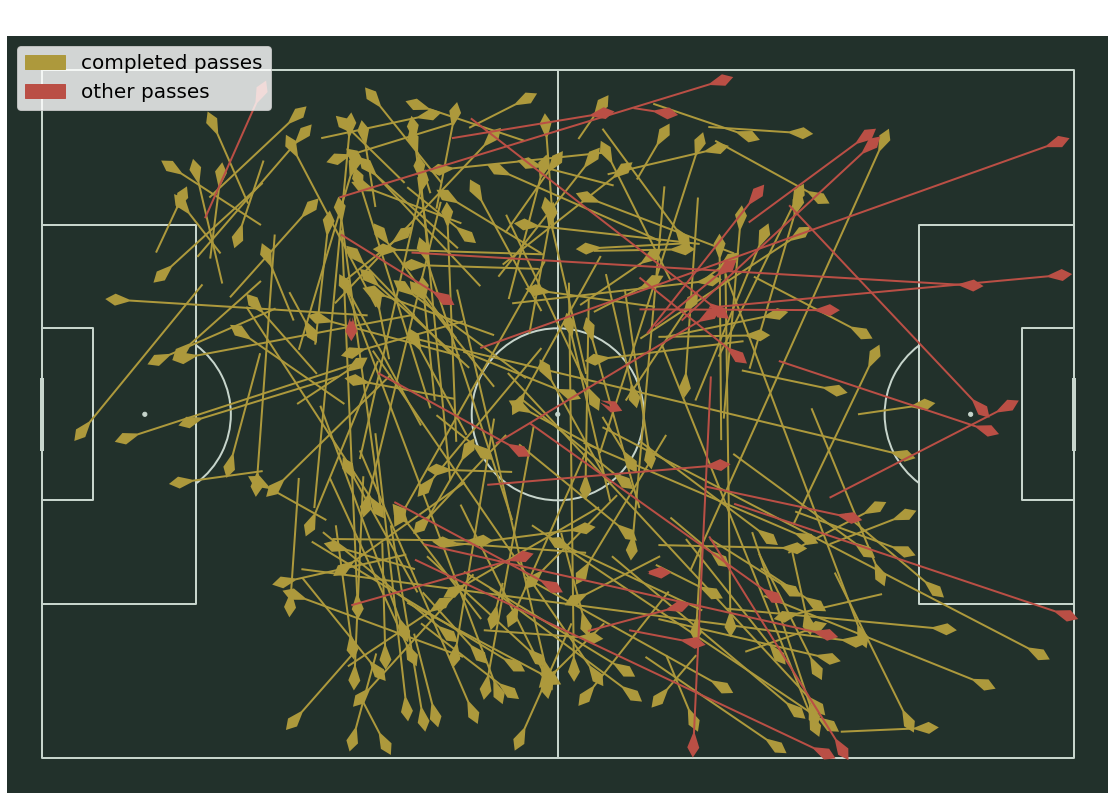

In [30]:
playerpasses('Keira Walsh',wc19)

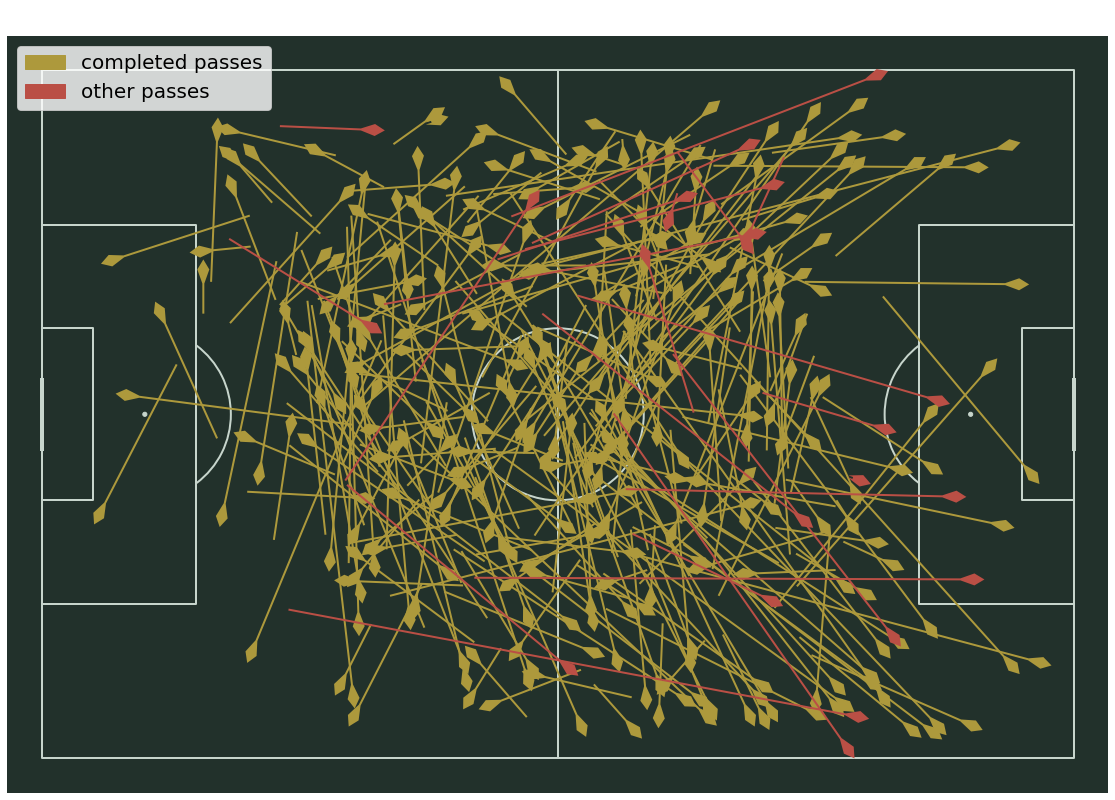

In [31]:
playerpasses('Keira Walsh',euro22)

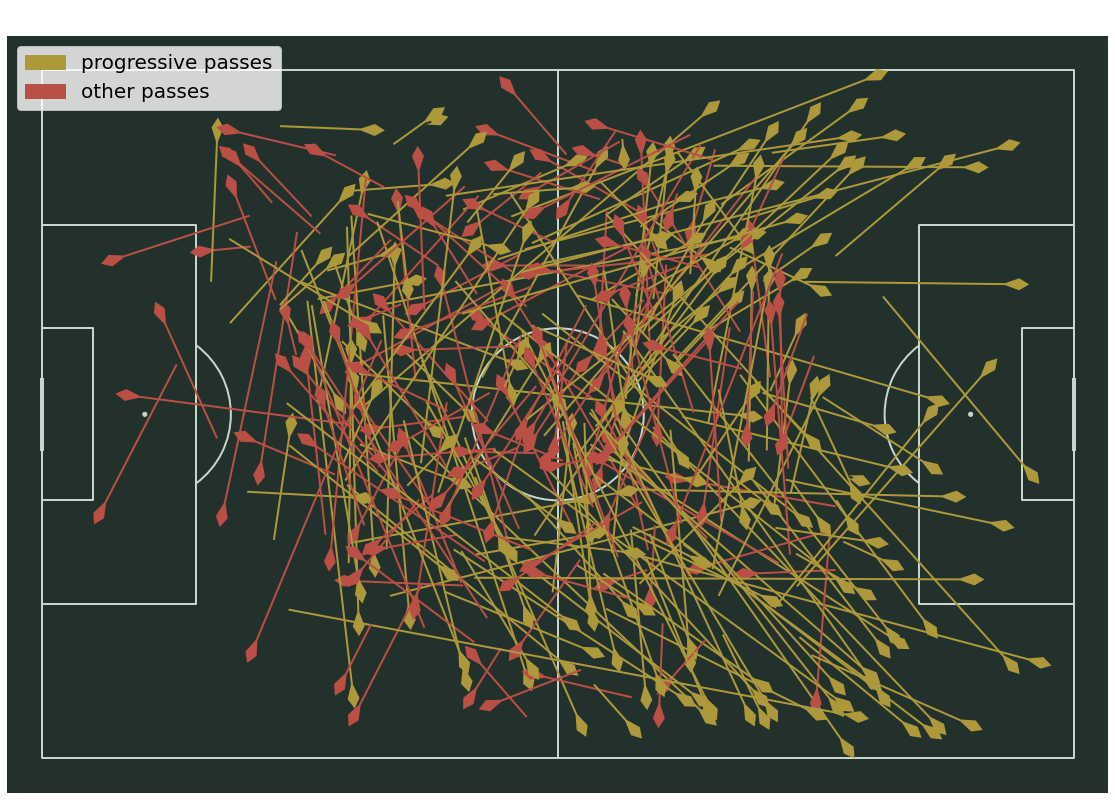

In [32]:
prog_passes('Keira Walsh', euro22)

### Kmeans - Keira Walsh EURO 22

In [33]:
columns_final = [#'player_id',
                 #'possession_team_id',
                 'period',
                 #'match_id',
                 #'pass_outcome_Complete',
                 'pass_angle',
                 'pass_length',
                 'start_x', 
                 'start_y', 
                 'end_x', 
                 'end_y',
                 'pass_height_Ground Pass', 
                 'pass_height_High Pass',
                 'pass_height_Low Pass']

# to add : period (to determine which half), 'match_id' to determine opponent

In [34]:
passes = euro22[(euro22['player_id'] == 4658) & 
                  #(euro22['period'] == 1) &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [35]:
passes.describe()

period  pass_angle  pass_length     start_x     start_y  \
count  316.000000  316.000000   316.000000  316.000000  316.000000   
mean     1.667722    0.032621    21.537229   59.627215   37.318038   
std      0.662153    1.725790    12.020674   18.200820   15.893070   
min      1.000000   -3.121595     2.088061   15.700000    6.000000   
25%      1.000000   -1.479533    12.737394   45.975000   24.600000   
50%      2.000000    0.222719    18.330933   62.100000   38.000000   
75%      2.000000    1.456017    26.177667   72.300000   50.250000   
max      4.000000    3.141593    71.943450   97.800000   75.200000   

            end_x       end_y  pass_height_Ground Pass  pass_height_High Pass  \
count  316.000000  316.000000               316.000000             316.000000   
mean    63.118987   39.056962                 0.844937               0.113924   
std     23.682213   21.775066                 0.362539               0.318223   
min      6.100000    0.700000                 0.000000               0.000000   
25%     45.100000   21.175000                 1.000000               0.000000   
50%     63.750000   37.600000                 1.000000               0.000000   
75%     81.750000   56.325000                 1.000000               0.000000   
max    117.400000   77.800000                 1.000000               1.000000   

       pass_height_Low Pass  
count            316.000000  
mean               0.041139  
std                0.198927  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [36]:
passes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 4 to 25979
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   period                   316 non-null    int64  
 1   pass_angle               316 non-null    float64
 2   pass_length              316 non-null    float64
 3   start_x                  316 non-null    float64
 4   start_y                  316 non-null    float64
 5   end_x                    316 non-null    float64
 6   end_y                    316 non-null    float64
 7   pass_height_Ground Pass  316 non-null    uint8  
 8   pass_height_High Pass    316 non-null    uint8  
 9   pass_height_Low Pass     316 non-null    uint8  
dtypes: float64(6), int64(1), uint8(3)
memory usage: 20.7 KB


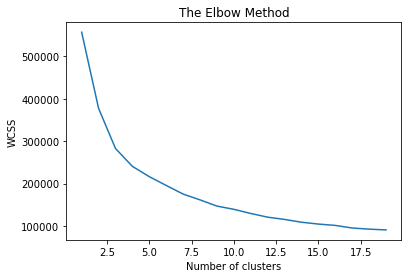

In [37]:
X = np.array(passes)


wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
N_clusters = 5
X = np.array(passes)

kmeans = KMeans(n_clusters = N_clusters, random_state = 42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)


In [39]:
kmeans.cluster_centers_

array([[ 1.75000000e+00,  3.81195567e-01,  1.83078201e+01,
         6.25031250e+01,  5.04921875e+01,  6.28796875e+01,
         5.46625000e+01,  9.53125000e-01,  3.12500000e-02,
         1.56250000e-02],
       [ 1.81250000e+00,  8.27637050e-01,  3.01962036e+01,
         7.59729167e+01,  4.59208333e+01,  9.36833333e+01,
         6.37270833e+01,  5.83333333e-01,  3.75000000e-01,
         4.16666667e-02],
       [ 1.53333333e+00, -2.91091019e-01,  1.53531037e+01,
         4.38683333e+01,  2.31133333e+01,  4.15500000e+01,
         1.93433333e+01,  9.16666667e-01,  5.00000000e-02,
         3.33333333e-02],
       [ 1.60344828e+00,  3.81334929e-02,  2.41395294e+01,
         4.03965517e+01,  4.28482759e+01,  3.69637931e+01,
         4.83913793e+01,  8.96551724e-01,  5.17241379e-02,
         5.17241379e-02],
       [ 1.66279070e+00, -4.48386887e-01,  2.16670587e+01,
         7.23279070e+01,  2.88930233e+01,  7.89255814e+01,
         2.11325581e+01,  8.25581395e-01,  1.16279070e-01,
         5.

In [40]:
passes['n_cluster'] = cluster_labels
passes.head(30)

period  pass_angle  pass_length  start_x  start_y  end_x  end_y  \
4         1   -2.624105    14.958610     69.7     16.6   56.7    9.2   
19        1   -0.837300    21.808256     21.9     29.4   36.5   13.2   
33        1   -1.559303    26.101725     35.7     57.3   36.0   31.2   
47        1   -1.359955    27.713715     32.0     38.7   37.8   11.6   
68        1    2.638193    23.631546     55.9     23.8   35.2   35.2   
107       1    1.037952    13.583077     28.5     28.3   35.4   40.0   
118       1    0.657528     9.980982     71.1     17.4   79.0   23.5   
132       1   -1.446441    16.930740     85.2     50.4   87.3   33.6   
142       1    1.627877    17.528547     65.7     16.4   64.7   33.9   
210       1   -1.937052    15.637135     27.2     26.7   21.6   12.1   
212       1    1.240960    11.732433     33.8     21.7   37.6   32.8   
218       1   -2.522640    17.925402     64.1     38.2   49.5   27.8   
224       1    3.141593    12.200000     63.3     22.7   51.1   22.7   
233       1   -1.815775     6.596969     29.6     33.1   28.0   26.7   
251       1    0.769183    13.083196     41.5     32.0   50.9   41.1   
264       1   -2.967494    20.205444     92.3     50.7   72.4   47.2   
290       2    2.047264    20.931316     15.7     34.2    6.1   52.8   
305       2   -0.621824     7.381734     40.9      8.6   46.9    4.3   
321       2   -2.093089    23.653542     69.8     51.7   58.0   31.2   
350       2   -1.996001    17.454226     20.4     42.8   13.2   26.9   
371       2    1.504386    42.193010     36.0     16.9   38.8   59.0   
380       2   -0.251504    44.603252     40.5     61.1   83.7   50.0   
386       2   -2.280708     8.438602     26.8     15.4   21.3    9.0   
387       2   -0.276798     9.148224     33.2     23.3   42.0   20.8   
393       2    2.655636    22.053118     69.4     19.9   49.9   30.2   
399       2   -1.553254    22.803509     82.2     45.5   82.6   22.7   
417       2    0.521434    10.840664     87.7     56.2   97.1   61.6   
425       2   -0.627404    21.122736     79.0     15.6   96.1    3.2   
432       2    1.856351    11.360018     78.3      9.2   75.1   20.1   
448       2    3.043319     7.134424     24.3     20.5   17.2   21.2   

     pass_height_Ground Pass  pass_height_High Pass  pass_height_Low Pass  \
4                          1                      0                     0   
19                         1                      0                     0   
33                         1                      0                     0   
47                         1                      0                     0   
68                         1                      0                     0   
107                        1                      0                     0   
118                        1                      0                     0   
132                        1                      0                     0   
142                        1                      0                     0   
210                        1                      0                     0   
212                        1                      0                     0   
218                        1                      0                     0   
224                        1                      0                     0   
233                        1                      0                     0   
251                        1                      0                     0   
264                        1                      0                     0   
290                        1                      0                     0   
305                        1                      0                     0   
321                        1                      0                     0   
350                        1                      0                     0   
371                        1                      0                     0   
380                        0                      1                     0   
3

In [41]:
passes['n_cluster'].value_counts()

4    86
0    64
2    60
3    58
1    48
Name: n_cluster, dtype: int64

In [42]:
sorted(passes['n_cluster'].unique())

[0, 1, 2, 3, 4]

reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

In [43]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_final)

In [44]:
centroids

period  pass_angle  pass_length    start_x    start_y      end_x  \
0  1.750000    0.381196    18.307820  62.503125  50.492187  62.879688   
1  1.812500    0.827637    30.196204  75.972917  45.920833  93.683333   
2  1.533333   -0.291091    15.353104  43.868333  23.113333  41.550000   
3  1.603448    0.038133    24.139529  40.396552  42.848276  36.963793   
4  1.662791   -0.448387    21.667059  72.327907  28.893023  78.925581   

       end_y  pass_height_Ground Pass  pass_height_High Pass  \
0  54.662500                 0.953125               0.031250   
1  63.727083                 0.583333               0.375000   
2  19.343333                 0.916667               0.050000   
3  48.391379                 0.896552               0.051724   
4  21.132558                 0.825581               0.116279   

   pass_height_Low Pass  
0              0.015625  
1              0.041667  
2              0.033333  
3              0.051724  
4              0.058140

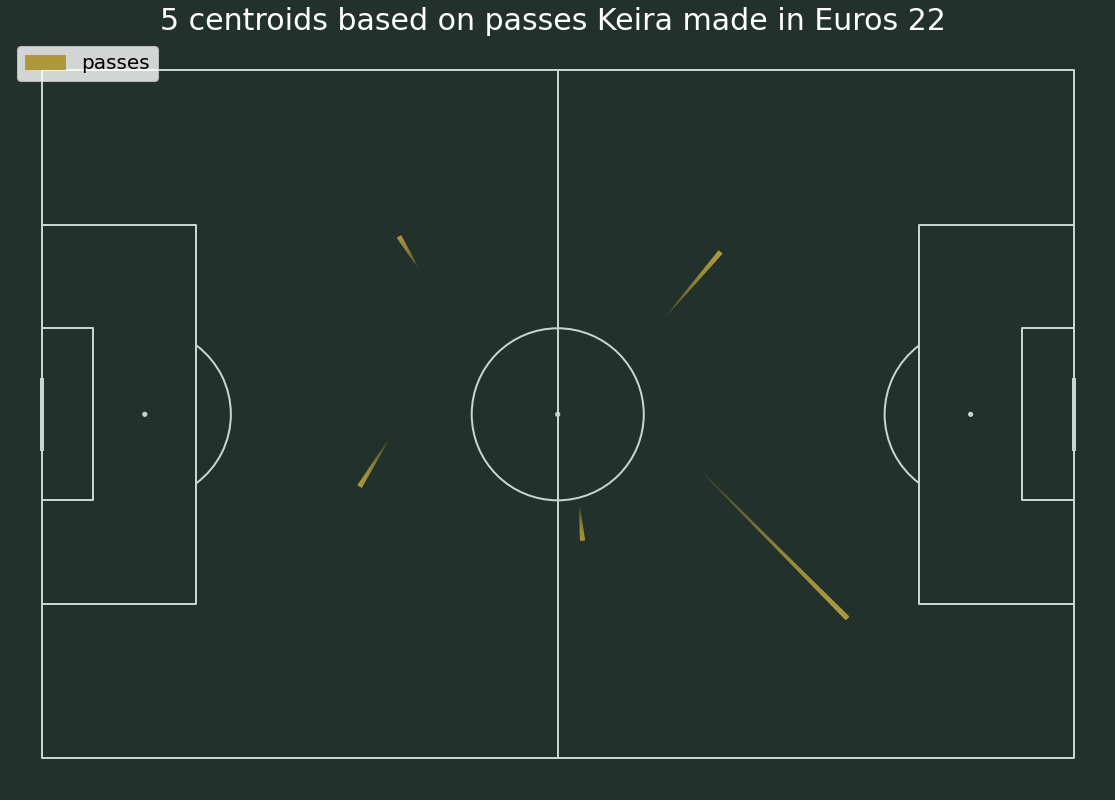

In [45]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

lc1 = pitch.lines(centroids['start_x'], centroids['start_y'],
                  centroids['end_x'], centroids['end_y'],
                  lw=5, transparent=True, comet=True,
                  color='#ad993c', ax=ax)
# Plot the legend
red_patch = mpatches.Patch(color='#ad993c', label='passes')
ax.legend(handles=[red_patch], fontsize=20, loc='upper left')
# Set the title
ax.set_title(f'5 centroids based on passes Keira made in Euros 22 ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

In [46]:
passes['n_cluster'].value_counts()

4    86
0    64
2    60
3    58
1    48
Name: n_cluster, dtype: int64

In [47]:
#passes = euro22[euro22.player == 'Keira Walsh']
passes_0 = passes[passes.n_cluster == 0]
passes_0

period  pass_angle  pass_length  start_x  start_y  end_x  end_y  \
264         1   -2.967494    20.205444     92.3     50.7   72.4   47.2   
321         2   -2.093089    23.653542     69.8     51.7   58.0   31.2   
380         2   -0.251504    44.603252     40.5     61.1   83.7   50.0   
556         2   -2.059487    23.217667     75.3     58.8   64.4   38.3   
628         3   -0.182612    29.185270     36.2     54.9   64.9   49.6   
...       ...         ...          ...      ...      ...    ...    ...   
25765       2   -1.970514    20.300247     64.1     50.8   56.2   32.1   
25780       2    2.148236    23.631546     62.9     30.2   50.0   50.0   
25883       2    2.527280    13.705838     64.3     52.7   53.1   60.6   
25973       2    1.535876    22.913969     63.1     41.0   63.9   63.9   
25976       2   -1.918972    28.723509     67.0     56.6   57.2   29.6   

       pass_height_Ground Pass  pass_height_High Pass  pass_height_Low Pass  \
264                          1                      0                     0   
321                          1                      0                     0   
380                          0                      1                     0   
556                          1                      0                     0   
628                          1                      0                     0   
...                        ...                    ...                   ...   
25765                        1                      0                     0   
25780                        1                      0                     0   
25883                        1                      0                     0   
25973                        1                      0                     0   
25976                        1                      0                     0   

       n_cluster  
264            0  
321            0  
380            0  
556            0  
628            0  
...          ...  
25765          0  
25780          0  
25883          0  
25973          0  
25976          0  

[64 rows x 11 columns]

In [48]:
def plot_clusters(df, name):
    n_clusters = df['n_cluster'].nunique()
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)
    
    colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    
    for lbl, col in zip(passes['n_cluster'].unique(), colors):
        #df_cluster = passes[passes['n_cluster'] == lbl]
        lc1 = pitch.arrows(df[df['n_cluster'] == lbl]['start_x'], 
                    df[df['n_cluster'] == lbl]['start_y'],
                    df[df['n_cluster'] == lbl]['end_x'],
                    df[df['n_cluster'] == lbl]['end_y'],
                    width=2,headwidth=6, headlength=5, headaxislength=12,color=col,ax=ax,
                       label=lbl)

    ax.legend(loc='lower right')
    ax.set_title(name, fontsize=20, color = 'w')
    plt.show()

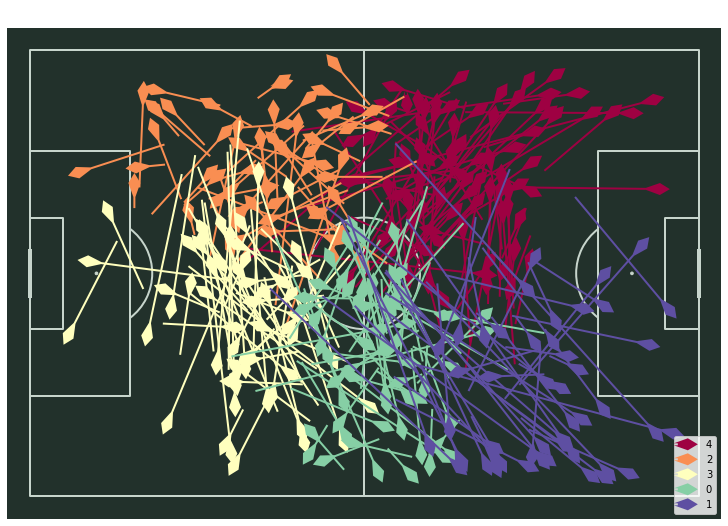

In [49]:
plot_clusters(passes, 'Keira Walsh')

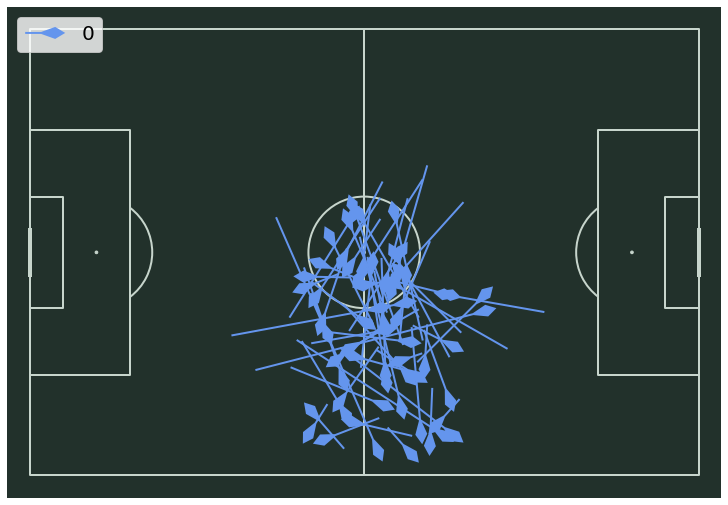

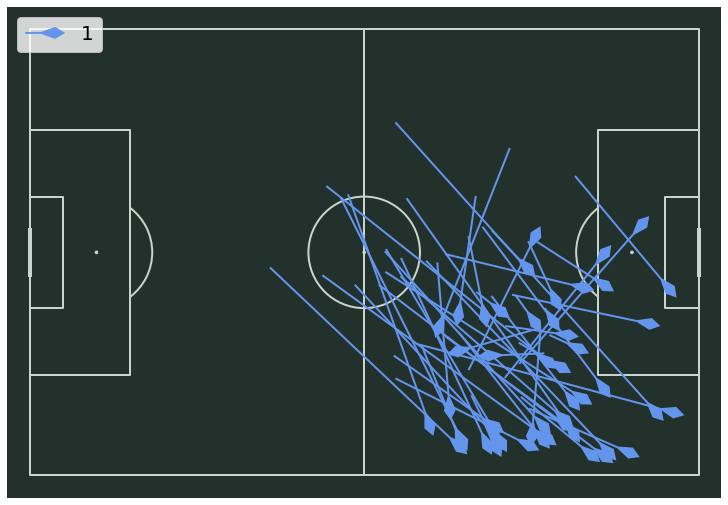

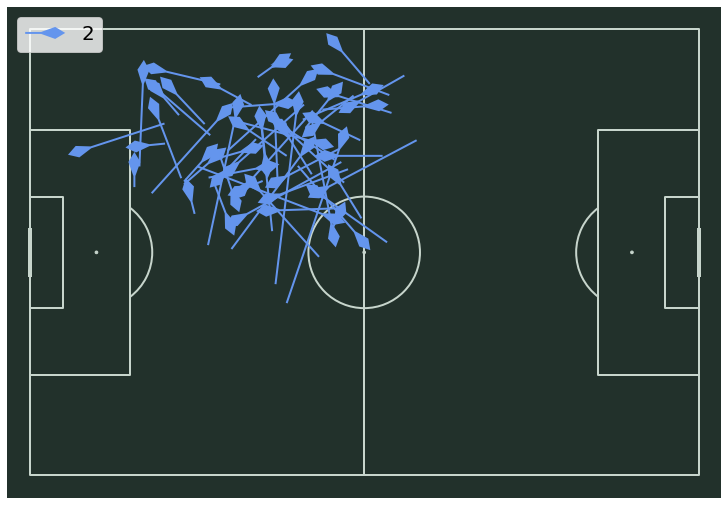

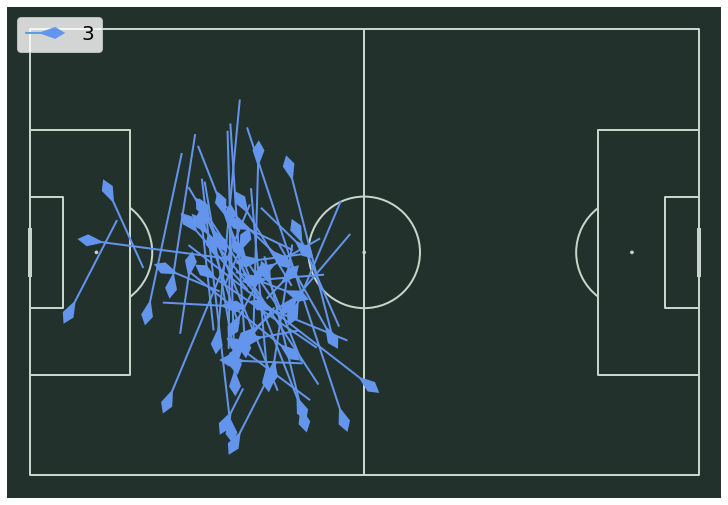

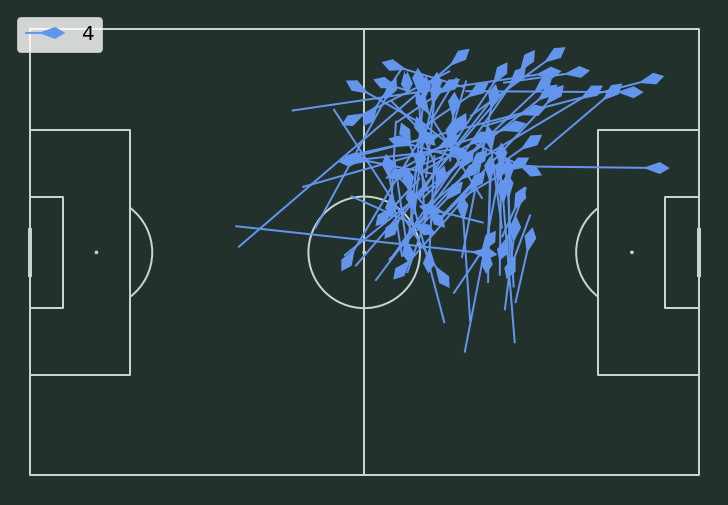

In [50]:
# pulling out passes for analysis by cluster



for c in sorted(passes['n_cluster'].unique()) :
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)

    lc1 = pitch.arrows(passes[passes['n_cluster'] == c]['start_x'], 
                      passes[passes['n_cluster'] == c]['start_y'],
                      passes[passes['n_cluster'] == c]['end_x'],
                      passes[passes['n_cluster'] == c]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='cornflowerblue',ax=ax,
                       label=c)
# Plot the legend

    ax.legend(fontsize=20, loc='upper left')
# Set the title
#ax.set_title(f'5 Main passes Keira Walsh made in the past 3 years ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')
    


In [51]:
def pass_analysis(cluster,df):
    df = df[df.n_cluster == cluster]
    
    analysis = euro22.iloc[df.index]
    
    return analysis

In [52]:
analysis_0 = pass_analysis(0,passes)

In [53]:
analysis_0.match_id.value_counts()

3835335    16
3835327    12
3835319    12
3844384    11
3845506     7
3847567     6
Name: match_id, dtype: int64

In [54]:
analysis_0.pass_recipient.value_counts()

Lucy Bronze        13
Leah Williamson    13
Millie Bright      12
Georgia Stanway     9
Ella Toone          5
Alex Greenwood      4
Bethany Mead        3
Francesca Kirby     3
Ellen White         1
Alessia Russo       1
Name: pass_recipient, dtype: int64

In [55]:
analysis_1 = pass_analysis(1,passes)
analysis_1 

period  pass_angle  pass_length   pass_recipient  possession_team  \
417         2    0.521434    10.840664  Georgia Stanway  England Women's   
644         3    0.757829    48.738180      Lauren Hemp  England Women's   
1533        1    0.809714    49.441380      Lucy Bronze  England Women's   
1618        1    0.716542    41.109608     Bethany Mead  England Women's   
1635        1    0.906102    26.425934      Lauren Hemp  England Women's   
1790        1    0.570383    44.077774     Bethany Mead  England Women's   
1808        1    0.822012    38.633923     Bethany Mead  England Women's   
1833        2    1.187585    20.593689      Lucy Bronze  England Women's   
1853        2    3.099601    11.910500  Leah Williamson  England Women's   
1856        2    0.913461    26.022490       Ella Toone  England Women's   
1937        2    2.863293    16.744253  Leah Williamson  England Women's   
1986        2    0.947597     7.881624       Ella Toone  England Women's   
1999        2    1.715696    23.546762       Ella Toone  England Women's   
2043        2    0.237943    27.576982      Chloe Kelly  England Women's   
2092        2    0.689171    18.399185      Chloe Kelly  England Women's   
2105        2    1.372228    16.728718  Leah Williamson  England Women's   
2161        2    0.664495     7.621680  Leah Williamson  England Women's   
2195        2    0.612081    24.191940      Chloe Kelly  England Women's   
8500        1    0.927817    38.360004     Bethany Mead  England Women's   
8532        1    0.810393    11.317244     Bethany Mead  England Women's   
8799        1    1.005647     4.854895  Georgia Stanway  England Women's   
8876        1    0.260602    49.677360      Lucy Bronze  England Women's   
9054        2    1.486193    28.401585      Lucy Bronze  England Women's   
9193        2    1.136361    13.780058  Georgia Stanway  England Women's   
9248        2    0.649931    52.881092      Chloe Kelly  England Women's   
9278        3    0.207496    27.183083      Lauren Hemp  England Women's   
9432        4    0.435084     7.829432  Georgia Stanway  England Women's   
17141       1   -1.107149    28.845278      Lauren Hemp  England Women's   
17143       1    0.571337    16.643316      Ellen White  England Women's   
17270       1    0.838498    71.943450      Lauren Hemp  England Women's   
17396       2    0.670010    52.818558     Bethany Mead  England Women's   
17401       2    1.652738    20.769690      Lucy Bronze  England Women's   
17403       2   -0.849567    35.286540      Lauren Hemp  England Women's   
17503       2    1.138209    38.881615      Lucy Bronze  England Women's   
17648       2    0.953360    53.718246      Lucy Bronze  England Women's   
17729       2    1.118018    12.343824      Lucy Bronze  England Women's   
17735       2    0.142957    13.336041      Lucy Bronze  England Women's   
17804       2    0.412147    21.718655      Lucy Bronze  England Women's   
17807       2    0.634436    28.681180     Bethany Mead  England Women's   
17831       2    1.231141    45.923634      Lucy Bronze  England Women's   
17836       2    0.463648    28.845278     Bethany Mead  England Women's   
17866       2    1.946222    36.545315    Millie Bright  England Women's   
25606       1    0.875156    28.398592      Ellen White  England Women's   
25685       2    1.033210    42.377472     Bethany Mead  England Women's   
25689       2   -0.894520    30.516390      Ellen White  England Women's   
25732       2    0.628088    51.906166     Bethany Mead  England Women's   
25761       2    1.107149    50.758743      Lucy Bronze  England Women's   
25979       2    0.834800    44.389750      Lauren Hemp  England Women's   

       possession_team_id       player  player_id  match_id  \
417                   865  Keira Walsh     4658.0   3847567   
644                   865  Keira Walsh     4658.0   3847567   
1533                  865  Keira Walsh     4658.0   3835335   
1618                  865  Kei

In [56]:
analysis_1.match_id.value_counts()

3835335    16
3835327    15
3844384     9
3835319     6
3847567     2
Name: match_id, dtype: int64

In [57]:
analysis_1.describe()

period  pass_angle  pass_length  possession_team_id  player_id  \
count  48.000000   48.000000    48.000000                48.0       48.0   
mean    1.812500    0.827637    30.196204               865.0     4658.0   
std     0.606919    0.736680    15.754207                 0.0        0.0   
min     1.000000   -1.107149     4.854895               865.0     4658.0   
25%     1.000000    0.571099    16.740369               865.0     4658.0   
50%     2.000000    0.816202    28.400089               865.0     4658.0   
75%     2.000000    1.109866    42.802547               865.0     4658.0   
max     4.000000    3.099601    71.943450               865.0     4658.0   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count  4.800000e+01                   48.0                     48.0   
mean   3.837537e+06                    1.0                      0.0   
std    4.134685e+03                    0.0                      0.0   
min    3.835319e+06                    1.0                      0.0   
25%    3.835327e+06                    1.0                      0.0   
50%    3.835335e+06                    1.0                      0.0   
75%    3.835335e+06                    1.0                      0.0   
max    3.847567e+06                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                           48.0              48.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown    start_x    start_y  \
count                       48.0                  48.0  48.000000  48.000000   
mean                         0.0                   0.0  75.972917  45.920833   
std                          0.0                   0.0  13.060901  12.307150   
min                          0.0                   0.0  43.100000  16.700000   
25%                          0.0                   0.0  65.600000  38.000000   
50%                          0.0                   0.0  78.700000  45.800000   
75%                          0.0                   0.0  87.325000  55.375000   
max                          0.0                   0.0  97.800000  68.000000   

            end_x      end_y  pass_height_Ground Pass  pass_height_High Pass  \
count   48.000000  48.000000                48.000000              48.000000   
mean    93.683333  63.727083                 0.583333               0.375000   
std     11.976810  12.642427                 0.498224               0.489246   
min     72.400000  33.500000                 0.000000               0.000000   
25%     84.600000  53.950000                 0.000000               0.000000   
50%     94.550000  68.800000                 1.000000               0.000000   
75%    101.550000  74.900000                 1.000000               1.000000   
max    117.400000  77.800000                 1.000000               1.000000   

       pass_height_Low Pass  
count             48.000000  
mean               0.041667  
std                0.201941  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [58]:
analysis_1.pass_recipient.value_counts()

Lucy Bronze        12
Bethany Mead       10
Lauren Hemp         7
Leah Williamson     4
Georgia Stanway     4
Chloe Kelly         4
Ella Toone          3
Ellen White         3
Millie Bright       1
Name: pass_recipient, dtype: int64

In [59]:
analysis_2 = pass_analysis(2,passes)
analysis_2 

period  pass_angle  pass_length   pass_recipient  possession_team  \
19          1   -0.837300    21.808256      Lauren Hemp  England Women's   
47          1   -1.359955    27.713715      Rachel Daly  England Women's   
68          1    2.638193    23.631546    Millie Bright  England Women's   
210         1   -1.937052    15.637135  Leah Williamson  England Women's   
212         1    1.240960    11.732433  Georgia Stanway  England Women's   
218         1   -2.522640    17.925402  Leah Williamson  England Women's   
224         1    3.141593    12.200000  Leah Williamson  England Women's   
233         1   -1.815775     6.596969      Rachel Daly  England Women's   
305         2   -0.621824     7.381734  Georgia Stanway  England Women's   
386         2   -2.280708     8.438602      Rachel Daly  Germany Women's   
387         2   -0.276798     9.148224       Ella Toone  Germany Women's   
393         2    2.655636    22.053118    Millie Bright  England Women's   
448         2    3.043319     7.134424      Rachel Daly  England Women's   
535         2   -2.547026    12.675173  Leah Williamson  England Women's   
884         1    2.660195    15.118201  Leah Williamson  England Women's   
896         1   -2.279422    11.985408      Rachel Daly  England Women's   
970         1   -0.186774    12.924783  Francesca Kirby  England Women's   
992         1    0.364136    28.359478      Ellen White  England Women's   
994         1   -2.131156    12.041595      Rachel Daly  England Women's   
1131        1   -1.528936    19.116747      Rachel Daly  England Women's   
1173        2   -1.672665    22.617250      Rachel Daly  England Women's   
1248        2    2.332670    12.024142  Leah Williamson  England Women's   
1285        2   -0.715092    10.065784  Francesca Kirby  England Women's   
1390        2    1.458231    11.573245  Georgia Stanway  England Women's   
1411        2   -2.782045    15.063200      Rachel Daly  England Women's   
1469        2   -0.404059    15.769908       Ella Toone  England Women's   
1526        1    2.462930    11.947385  Leah Williamson  England Women's   
1580        1    1.385185    23.300215  Georgia Stanway  England Women's   
1597        1    2.299776    21.317833    Millie Bright  England Women's   
1796        1    1.205595    10.920165  Georgia Stanway  England Women's   
2024        2    3.107592    14.708501   Alex Greenwood  England Women's   
2235        2   -0.291457     2.088061      Chloe Kelly  England Women's   
8437        1   -2.648293    10.558883  Leah Williamson  England Women's   
8525        1   -2.833234    14.168275  Leah Williamson  England Women's   
8597        1   -2.428794    15.597436  Leah Williamson  England Women's   
8622        1   -2.124749    11.405701  Leah Williamson  England Women's   
8685        1   -0.839609     9.135098  Francesca Kirby  England Women's   
8689        1    2.828537    18.183784  Leah Williamson  England Women's   
8749        1   -0.733831    21.949488      Lauren Hemp  England Women's   
8781        1    2.625189    13.569451      Rachel Daly  England Women's   
8788        1   -2.400284    19.252012  Leah Williamson  England Women's   
9109        2   -2.569816    13.675160  Leah Williamson  England Women's   
9307        3   -1.127694     6.530697       Ella Toone  England Women's   
9388        3   -2.908498    14.286357  Leah Williamson  England Women's   
9391        3   -2.325901    11.672618   Alex Greenwood  England Women's   
9410        3    0.859993    19.925110      Chloe Kelly  England Women's   
9412        4   -2.303240    20.039211  Leah Williamson  England Women's   
17032       1    0.257618    17.269917      Ellen White  England Women's   
17288       1    2.416619    19.906029    Millie Bright  England Women's   
17342       1   -0.075487    11.933985      Lauren Hemp  England Women's   
17584       2   -2.701287    11.496521  Leah Williamson  England Women's   
17693       2    2.750188     6.815423  Leah Williamson

In [60]:
analysis_2.match_id.value_counts()

3844384    15
3847567    14
3845506    12
3835319     8
3835335     6
3835327     5
Name: match_id, dtype: int64

In [61]:
analysis_2.describe()

period  pass_angle  pass_length  possession_team_id  player_id  \
count  60.000000   60.000000    60.000000           60.000000       60.0   
mean    1.533333   -0.291091    15.353104          864.733333     4658.0   
std     0.700282    1.992987     6.654529            1.448163        0.0   
min     1.000000   -2.908498     2.088061          857.000000     4658.0   
25%     1.000000   -2.126351    11.473816          865.000000     4658.0   
50%     1.000000   -0.785565    13.921717          865.000000     4658.0   
75%     2.000000    1.403446    19.415516          865.000000     4658.0   
max     4.000000    3.141593    34.853980          865.000000     4658.0   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count  6.000000e+01                   60.0                     60.0   
mean   3.842483e+06                    1.0                      0.0   
std    5.040373e+03                    0.0                      0.0   
min    3.835319e+06                    1.0                      0.0   
25%    3.835335e+06                    1.0                      0.0   
50%    3.844384e+06                    1.0                      0.0   
75%    3.845506e+06                    1.0                      0.0   
max    3.847567e+06                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                           60.0              60.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown    start_x    start_y  \
count                       60.0                  60.0  60.000000  60.000000   
mean                         0.0                   0.0  43.868333  23.113333   
std                          0.0                   0.0  13.278446   9.520708   
min                          0.0                   0.0  18.800000   6.000000   
25%                          0.0                   0.0  32.700000  16.000000   
50%                          0.0                   0.0  44.300000  22.700000   
75%                          0.0                   0.0  54.850000  27.575000   
max                          0.0                   0.0  69.400000  49.100000   

           end_x      end_y  pass_height_Ground Pass  pass_height_High Pass  \
count  60.000000  60.000000                60.000000              60.000000   
mean   41.550000  19.343333                 0.916667               0.050000   
std    12.716818   9.911428                 0.278718               0.219784   
min     6.900000   0.700000                 0.000000               0.000000   
25%    35.275000  11.000000                 1.000000               0.000000   
50%    42.450000  19.300000                 1.000000               0.000000   
75%    51.125000  26.975000                 1.000000               0.000000   
max    64.400000  39.600000                 1.000000               1.000000   

       pass_height_Low Pass  
count             60.000000  
mean               0.033333  
std                0.181020  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [62]:
analysis_2.pass_recipient.value_counts()

Leah Williamson    18
Rachel Daly        13
Ella Toone          6
Millie Bright       5
Georgia Stanway     5
Francesca Kirby     4
Lauren Hemp         3
Alex Greenwood      2
Ellen White         2
Chloe Kelly         2
Name: pass_recipient, dtype: int64

In [63]:
silhouette_score(X, cluster_labels)

0.23630664125778825

### Progressive Passes -- EURO 22 

In [64]:
prog_passes = euro22[(euro22['player_id'] == 4658) & 
                  (euro22['end_x'] > euro22['start_x']) &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [65]:
N_clusters =5
X_prog = np.array(prog_passes)

kmeans = KMeans(n_clusters = N_clusters, random_state = 42)
kmeans.fit(X_prog)
cluster_labels = kmeans.predict(X_prog)


In [66]:
kmeans.cluster_centers_

array([[ 1.70000000e+00, -5.60995660e-01,  2.31043954e+01,
         6.94880000e+01,  2.85660000e+01,  8.44980000e+01,
         1.63580000e+01,  7.60000000e-01,  1.80000000e-01,
         6.00000000e-02],
       [ 1.67741935e+00,  7.81810635e-01,  3.01619803e+01,
         4.52838710e+01,  4.03000000e+01,  5.89516129e+01,
         5.98612903e+01,  7.74193548e-01,  2.25806452e-01,
        -2.77555756e-17],
       [ 1.74193548e+00,  2.04907345e-01,  1.65192499e+01,
         8.04258065e+01,  5.15193548e+01,  9.12225806e+01,
         5.30000000e+01,  8.70967742e-01,  1.29032258e-01,
        -2.77555756e-17],
       [ 1.55882353e+00, -3.41571656e-01,  1.70810526e+01,
         3.71000000e+01,  3.09617647e+01,  4.54970588e+01,
         2.50029412e+01,  8.23529412e-01,  2.94117647e-02,
         1.47058824e-01],
       [ 1.76923077e+00,  8.44277925e-01,  4.05908390e+01,
         6.38461538e+01,  4.42269231e+01,  9.04884615e+01,
         7.29230769e+01,  4.23076923e-01,  5.38461538e-01,
         3.

In [67]:
prog_passes['n_cluster'] = cluster_labels
prog_passes.head(30)

period  pass_angle  pass_length  start_x  start_y  end_x  end_y  \
19         1   -0.837300    21.808256     21.9     29.4   36.5   13.2   
33         1   -1.559303    26.101725     35.7     57.3   36.0   31.2   
47         1   -1.359955    27.713715     32.0     38.7   37.8   11.6   
107        1    1.037952    13.583077     28.5     28.3   35.4   40.0   
118        1    0.657528     9.980982     71.1     17.4   79.0   23.5   
132        1   -1.446441    16.930740     85.2     50.4   87.3   33.6   
212        1    1.240960    11.732433     33.8     21.7   37.6   32.8   
251        1    0.769183    13.083196     41.5     32.0   50.9   41.1   
305        2   -0.621824     7.381734     40.9      8.6   46.9    4.3   
371        2    1.504386    42.193010     36.0     16.9   38.8   59.0   
380        2   -0.251504    44.603252     40.5     61.1   83.7   50.0   
387        2   -0.276798     9.148224     33.2     23.3   42.0   20.8   
399        2   -1.553254    22.803509     82.2     45.5   82.6   22.7   
417        2    0.521434    10.840664     87.7     56.2   97.1   61.6   
425        2   -0.627404    21.122736     79.0     15.6   96.1    3.2   
464        2    0.108088    47.275894     36.9     35.3   83.9   40.4   
628        3   -0.182612    29.185270     36.2     54.9   64.9   49.6   
642        3    0.364614    14.021769     37.0     43.5   50.1   48.5   
644        3    0.757829    48.738180     43.1     42.7   78.5   76.2   
647        3   -0.814587    19.382982     64.4     41.4   77.7   27.3   
755        4    1.480566    21.085777     68.5     53.4   70.4   74.4   
970        1   -0.186774    12.924783     32.1     26.6   44.8   24.2   
992        1    0.364136    28.359478     30.1     24.6   56.6   34.7   
1012       1   -0.863552    47.095646     58.4     42.5   89.0    6.7   
1069       1    1.159584    47.783367     44.2     33.7   63.3   77.5   
1078       1   -1.465919    19.104973     71.1     26.6   73.1    7.6   
1131       1   -1.528936    19.116747     19.7     24.6   20.5    5.5   
1135       1    1.252346    57.490520     39.0     17.6   57.0   72.2   
1139       1   -0.814292    12.238055     73.3     34.5   81.7   25.6   
1147       1    0.386026    20.185390     46.8     60.6   65.5   68.2   

      pass_height_Ground Pass  pass_height_High Pass  pass_height_Low Pass  \
19                          1                      0                     0   
33                          1                      0                     0   
47                          1                      0                     0   
107                         1                      0                     0   
118                         1                      0                     0   
132                         1                      0                     0   
212                         1                      0                     0   
251                         1                      0                     0   
305                         1                      0                     0   
371                         1                      0                     0   
380                         0                      1                     0   
387                         0                      0                     1   
399                         1                      0                     0   
417                         1                      0                     0   
425                         1                      0                     0   
464                         0                      1                     0   
628                         1                      0                     0   
642                         1                      0                     0   
644                         1                      0                     0   
647                         1                      0                     0   
755                         1                      0                     0   
970                       

In [68]:
prog_passes['n_cluster'].value_counts()

0    50
3    34
2    31
1    31
4    26
Name: n_cluster, dtype: int64

In [69]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_final)

In [70]:
centroids.pass_length.mean()

25.49150342588282

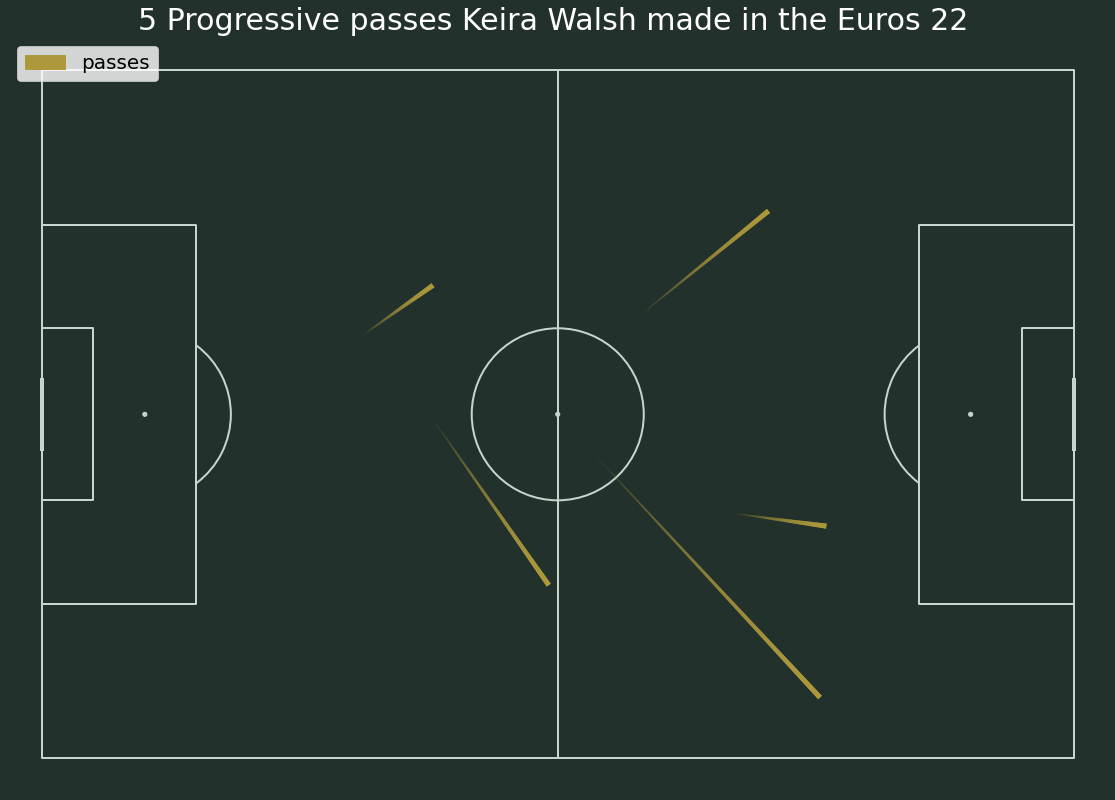

In [70]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

lc1 = pitch.lines(centroids['start_x'], centroids['start_y'],
                  centroids['end_x'], centroids['end_y'],
                  lw=5, transparent=True, comet=True,
                  color='#ad993c', ax=ax)
# Plot the legend
red_patch = mpatches.Patch(color='#ad993c', label='passes')
ax.legend(handles=[red_patch], fontsize=20, loc='upper left')
# Set the title
ax.set_title(f'5 Progressive passes Keira Walsh made in the Euros 22 ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

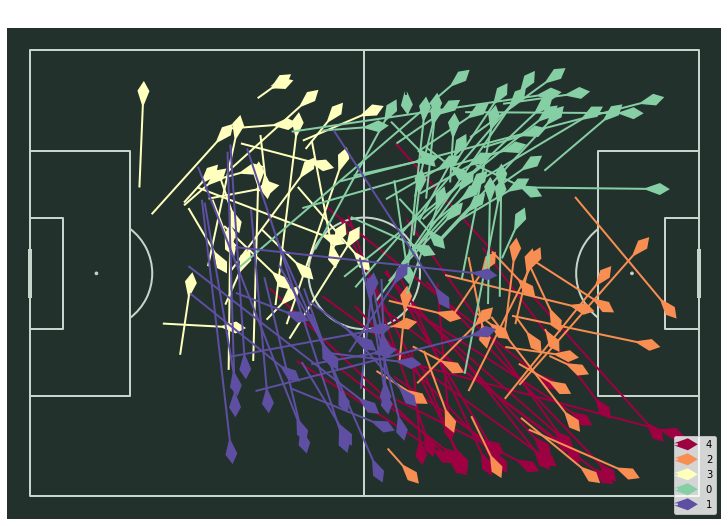

In [71]:
plot_clusters(prog_passes, 'Keira Walsh')

In [72]:
### For analysis

In [73]:
analysis_4 = pass_analysis(4,passes)

In [74]:
analysis_4.match_id.value_counts()

3835327    24
3835335    20
3835319    13
3847567    12
3845506    10
3844384     7
Name: match_id, dtype: int64

In [75]:
analysis_4.describe()

period  pass_angle  pass_length  possession_team_id  player_id  \
count  86.000000   86.000000    86.000000           86.000000       86.0   
mean    1.662791   -0.448387    21.667059          864.837209     4658.0   
std     0.643711    1.470736    11.629504            1.072221        0.0   
min     1.000000   -2.947851     3.612478          857.000000     4658.0   
25%     1.000000   -1.465484    13.197115          865.000000     4658.0   
50%     2.000000   -0.732866    18.295870          865.000000     4658.0   
75%     2.000000    0.342519    26.011791          865.000000     4658.0   
max     4.000000    3.034382    60.030160          865.000000     4658.0   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count  8.600000e+01                   86.0                     86.0   
mean   3.838956e+06                    1.0                      0.0   
std    5.173830e+03                    0.0                      0.0   
min    3.835319e+06                    1.0                      0.0   
25%    3.835327e+06                    1.0                      0.0   
50%    3.835335e+06                    1.0                      0.0   
75%    3.845226e+06                    1.0                      0.0   
max    3.847567e+06                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                           86.0              86.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown    start_x    start_y  \
count                       86.0                  86.0  86.000000  86.000000   
mean                         0.0                   0.0  72.327907  28.893023   
std                          0.0                   0.0  11.116693  12.466027   
min                          0.0                   0.0  36.900000   7.100000   
25%                          0.0                   0.0  66.800000  20.800000   
50%                          0.0                   0.0  72.900000  26.800000   
75%                          0.0                   0.0  80.525000  37.975000   
max                          0.0                   0.0  92.300000  58.000000   

            end_x      end_y  pass_height_Ground Pass  pass_height_High Pass  \
count   86.000000  86.000000                86.000000              86.000000   
mean    78.925581  21.132558                 0.825581               0.116279   
std     13.296768  11.726014                 0.381695               0.322439   
min     55.400000   3.200000                 0.000000               0.000000   
25%     69.225000   9.925000                 1.000000               0.000000   
50%     78.600000  20.600000                 1.000000               0.000000   
75%     85.775000  27.150000                 1.000000               0.000000   
max    114.800000  46.400000                 1.000000               1.000000   

       pass_height_Low Pass  
count              86.00000  
mean                0.05814  
std                 0.23538  
min                 0.00000  
25%                 0.00000  
50%                 0.00000  
75%                 0.00000  
max                 1.00000

In [76]:
analysis_4.pass_recipient.value_counts()

Lauren Hemp        16
Leah Williamson    15
Rachel Daly        12
Francesca Kirby    11
Georgia Stanway     7
Alex Greenwood      6
Millie Bright       5
Ella Toone          4
Bethany Mead        4
Chloe Kelly         2
Alessia Russo       2
Ellen White         1
Lucy Bronze         1
Name: pass_recipient, dtype: int64

In [71]:
analysis_0 = pass_analysis(0,passes)
analysis_0.pass_length.mean() 

18.307820084374995

In [78]:
analysis_0.match_id.value_counts()

3835335    16
3835327    12
3835319    12
3844384    11
3845506     7
3847567     6
Name: match_id, dtype: int64

In [79]:
analysis_0.describe()

period  pass_angle  pass_length  possession_team_id  player_id  \
count  64.000000   64.000000    64.000000            64.00000       64.0   
mean    1.750000    0.381196    18.307820           864.90625     4658.0   
std     0.642416    1.816326     8.229639             0.75000        0.0   
min     1.000000   -3.121595     6.545991           859.00000     4658.0   
25%     1.000000   -1.123440    12.538503           865.00000     4658.0   
50%     2.000000    0.842022    17.504566           865.00000     4658.0   
75%     2.000000    1.860913    23.216859           865.00000     4658.0   
max     4.000000    2.959424    47.783367           865.00000     4658.0   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count  6.400000e+01                   64.0                     64.0   
mean   3.839145e+06                    1.0                      0.0   
std    5.029402e+03                    0.0                      0.0   
min    3.835319e+06                    1.0                      0.0   
25%    3.835327e+06                    1.0                      0.0   
50%    3.835335e+06                    1.0                      0.0   
75%    3.844384e+06                    1.0                      0.0   
max    3.847567e+06                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                           64.0              64.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown    start_x    start_y  \
count                       64.0                  64.0  64.000000  64.000000   
mean                         0.0                   0.0  62.503125  50.492188   
std                          0.0                   0.0  10.322359  11.696429   
min                          0.0                   0.0  36.200000  24.400000   
25%                          0.0                   0.0  56.400000  43.750000   
50%                          0.0                   0.0  62.900000  52.900000   
75%                          0.0                   0.0  69.575000  57.150000   
max                          0.0                   0.0  92.300000  75.200000   

           end_x      end_y  pass_height_Ground Pass  pass_height_High Pass  \
count  64.000000  64.000000                64.000000              64.000000   
mean   62.879688  54.662500                 0.953125               0.031250   
std     8.823385  13.482964                 0.213042               0.175368   
min    47.100000  29.600000                 0.000000               0.000000   
25%    55.975000  45.125000                 1.000000               0.000000   
50%    63.950000  54.000000                 1.000000               0.000000   
75%    69.425000  65.700000                 1.000000               0.000000   
max    83.700000  77.700000                 1.000000               1.000000   

       pass_height_Low Pass  
count             64.000000  
mean               0.015625  
std                0.125000  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [80]:
analysis_0.pass_recipient.value_counts()

Lucy Bronze        13
Leah Williamson    13
Millie Bright      12
Georgia Stanway     9
Ella Toone          5
Alex Greenwood      4
Francesca Kirby     3
Bethany Mead        3
Ellen White         1
Alessia Russo       1
Name: pass_recipient, dtype: int64

In [81]:
analysis_2 = pass_analysis(2,passes)
analysis_2 

period  pass_angle  pass_length   pass_recipient  possession_team  \
19          1   -0.837300    21.808256      Lauren Hemp  England Women's   
47          1   -1.359955    27.713715      Rachel Daly  England Women's   
68          1    2.638193    23.631546    Millie Bright  England Women's   
210         1   -1.937052    15.637135  Leah Williamson  England Women's   
212         1    1.240960    11.732433  Georgia Stanway  England Women's   
218         1   -2.522640    17.925402  Leah Williamson  England Women's   
224         1    3.141593    12.200000  Leah Williamson  England Women's   
233         1   -1.815775     6.596969      Rachel Daly  England Women's   
305         2   -0.621824     7.381734  Georgia Stanway  England Women's   
386         2   -2.280708     8.438602      Rachel Daly  Germany Women's   
387         2   -0.276798     9.148224       Ella Toone  Germany Women's   
393         2    2.655636    22.053118    Millie Bright  England Women's   
448         2    3.043319     7.134424      Rachel Daly  England Women's   
535         2   -2.547026    12.675173  Leah Williamson  England Women's   
884         1    2.660195    15.118201  Leah Williamson  England Women's   
896         1   -2.279422    11.985408      Rachel Daly  England Women's   
970         1   -0.186774    12.924783  Francesca Kirby  England Women's   
992         1    0.364136    28.359478      Ellen White  England Women's   
994         1   -2.131156    12.041595      Rachel Daly  England Women's   
1131        1   -1.528936    19.116747      Rachel Daly  England Women's   
1173        2   -1.672665    22.617250      Rachel Daly  England Women's   
1248        2    2.332670    12.024142  Leah Williamson  England Women's   
1285        2   -0.715092    10.065784  Francesca Kirby  England Women's   
1390        2    1.458231    11.573245  Georgia Stanway  England Women's   
1411        2   -2.782045    15.063200      Rachel Daly  England Women's   
1469        2   -0.404059    15.769908       Ella Toone  England Women's   
1526        1    2.462930    11.947385  Leah Williamson  England Women's   
1580        1    1.385185    23.300215  Georgia Stanway  England Women's   
1597        1    2.299776    21.317833    Millie Bright  England Women's   
1796        1    1.205595    10.920165  Georgia Stanway  England Women's   
2024        2    3.107592    14.708501   Alex Greenwood  England Women's   
2235        2   -0.291457     2.088061      Chloe Kelly  England Women's   
8437        1   -2.648293    10.558883  Leah Williamson  England Women's   
8525        1   -2.833234    14.168275  Leah Williamson  England Women's   
8597        1   -2.428794    15.597436  Leah Williamson  England Women's   
8622        1   -2.124749    11.405701  Leah Williamson  England Women's   
8685        1   -0.839609     9.135098  Francesca Kirby  England Women's   
8689        1    2.828537    18.183784  Leah Williamson  England Women's   
8749        1   -0.733831    21.949488      Lauren Hemp  England Women's   
8781        1    2.625189    13.569451      Rachel Daly  England Women's   
8788        1   -2.400284    19.252012  Leah Williamson  England Women's   
9109        2   -2.569816    13.675160  Leah Williamson  England Women's   
9307        3   -1.127694     6.530697       Ella Toone  England Women's   
9388        3   -2.908498    14.286357  Leah Williamson  England Women's   
9391        3   -2.325901    11.672618   Alex Greenwood  England Women's   
9410        3    0.859993    19.925110      Chloe Kelly  England Women's   
9412        4   -2.303240    20.039211  Leah Williamson  England Women's   
17032       1    0.257618    17.269917      Ellen White  England Women's   
17288       1    2.416619    19.906029    Millie Bright  England Women's   
17342       1   -0.075487    11.933985      Lauren Hemp  England Women's   
17584       2   -2.701287    11.496521  Leah Williamson  England Women's   
17693       2    2.750188     6.815423  Leah Williamson

In [82]:
analysis_2.match_id.value_counts()

3844384    15
3847567    14
3845506    12
3835319     8
3835335     6
3835327     5
Name: match_id, dtype: int64

In [83]:
analysis_2.describe()

period  pass_angle  pass_length  possession_team_id  player_id  \
count  60.000000   60.000000    60.000000           60.000000       60.0   
mean    1.533333   -0.291091    15.353104          864.733333     4658.0   
std     0.700282    1.992987     6.654529            1.448163        0.0   
min     1.000000   -2.908498     2.088061          857.000000     4658.0   
25%     1.000000   -2.126351    11.473816          865.000000     4658.0   
50%     1.000000   -0.785565    13.921717          865.000000     4658.0   
75%     2.000000    1.403446    19.415516          865.000000     4658.0   
max     4.000000    3.141593    34.853980          865.000000     4658.0   

           match_id  pass_outcome_Complete  pass_outcome_Incomplete  \
count  6.000000e+01                   60.0                     60.0   
mean   3.842483e+06                    1.0                      0.0   
std    5.040373e+03                    0.0                      0.0   
min    3.835319e+06                    1.0                      0.0   
25%    3.835335e+06                    1.0                      0.0   
50%    3.844384e+06                    1.0                      0.0   
75%    3.845506e+06                    1.0                      0.0   
max    3.847567e+06                    1.0                      0.0   

       pass_outcome_Injury Clearance  pass_outcome_Out  \
count                           60.0              60.0   
mean                             0.0               0.0   
std                              0.0               0.0   
min                              0.0               0.0   
25%                              0.0               0.0   
50%                              0.0               0.0   
75%                              0.0               0.0   
max                              0.0               0.0   

       pass_outcome_Pass Offside  pass_outcome_Unknown    start_x    start_y  \
count                       60.0                  60.0  60.000000  60.000000   
mean                         0.0                   0.0  43.868333  23.113333   
std                          0.0                   0.0  13.278446   9.520708   
min                          0.0                   0.0  18.800000   6.000000   
25%                          0.0                   0.0  32.700000  16.000000   
50%                          0.0                   0.0  44.300000  22.700000   
75%                          0.0                   0.0  54.850000  27.575000   
max                          0.0                   0.0  69.400000  49.100000   

           end_x      end_y  pass_height_Ground Pass  pass_height_High Pass  \
count  60.000000  60.000000                60.000000              60.000000   
mean   41.550000  19.343333                 0.916667               0.050000   
std    12.716818   9.911428                 0.278718               0.219784   
min     6.900000   0.700000                 0.000000               0.000000   
25%    35.275000  11.000000                 1.000000               0.000000   
50%    42.450000  19.300000                 1.000000               0.000000   
75%    51.125000  26.975000                 1.000000               0.000000   
max    64.400000  39.600000                 1.000000               1.000000   

       pass_height_Low Pass  
count             60.000000  
mean               0.033333  
std                0.181020  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [84]:
analysis_2.pass_recipient.value_counts()

Leah Williamson    18
Rachel Daly        13
Ella Toone          6
Millie Bright       5
Georgia Stanway     5
Francesca Kirby     4
Lauren Hemp         3
Ellen White         2
Chloe Kelly         2
Alex Greenwood      2
Name: pass_recipient, dtype: int64